1. The dataset (‘roo-data.csv’) provides anonymized information for graduates along with their respective scores in various CS subjects. Specifically, the suggested job role is predicted for every graduate based on the courses they have done.
2. The task is to make a ML-based prediction system to predict the job role for a new graduate.
3. Specifically, you will have to do the following:
* Study the given data thoroughly and then modify it/prepare it considering the end goal at hand – suggesting a suitable role.
* Divide it into training and testing sets.
* Using the sklearn library, train a ML model (ANN) using the training data.
* Predict the outcome for the testing data.
* Using the predicted labels and actual labels, find out accuracy, confusion matrix and class-wise accuracies.
* Also, you need to experiment with data preparation - analyze what modifications produce better results and why. Try out different ratios of train-test splits (60-40, 70-30, 90-10 etc.), shuffling the data etc.
* You do not have to connect this data or the prediction system with your electives advisory system that you have already built in assignment 1. This can be independent of that. The aim is to get you to build a ML model for prediction of job role on training data. However, if you want to you can rename some of the courses with the electives that you have considered, but use the given data for those attributes.
* You are free to club some job roles like “Business Intelligence Analyst” and “Business Systems Analyst” into “Analyst”, etc. and reduce it to 5 to 7 class classification task. 
* Similarly, for the values of various attributes you can bucketize the values into various ranges or categorize them such as “high”, “medium”, “low”.
4. You are required to submit in a zip file consisting of your code (.py file/ .ipynb notebook) along with a report. The report (in pdf format) should contain the steps you did for data preparation/modification, the experiments you performed, results, analysis on the obtained results, and the listing of the program. 

In [1]:
#importing libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import pickle

In [2]:
data = pd.read_csv("C:/Users/Simran/Downloads/Subjects/AI/Assignment/Assignment 4/roo_data.csv")
data.head()

,Acedamic percentage in Operating Systems,percentage in Algorithms,Percentage in Programming Concepts,Percentage in Software Engineering,Percentage in Computer Networks,Percentage in Electronics Subjects,Percentage in Computer Architecture,Percentage in Mathematics,Percentage in Communication skills,Hours working per day,...,Interested Type of Books,Salary Range Expected,In a Realtionship?,Gentle or Tuff behaviour?,Management or Technical,Salary/work,hard/smart worker,worked in teams ever?,Introvert,Suggested Job Role
0,69,63,78,87,94,94,87,84,61,9,...,Prayer books,salary,no,stubborn,Management,salary,hard worker,yes,no,Database Developer
1,78,62,73,60,71,70,73,84,91,12,...,Childrens,salary,yes,gentle,Technical,salary,hard worker,no,yes,Portal Administrator
2,71,86,91,87,61,81,72,72,94,11,...,Travel,Work,no,stubborn,Management,work,hard worker,no,yes,Portal Administrator
3,76,87,60,84,89,73,62,88,69,7,...,Romance,Work,yes,gentle,Management,work,smart worker,yes,yes,Systems Security Administrator
4,92,62,90,67,71,89,73,71,73,4,...,Cookbooks,salary,no,stubborn,Management,work,hard worker,yes,yes,Business Systems Analyst


In [3]:
data.columns

Index(['Acedamic percentage in Operating Systems', 'percentage in Algorithms',
       'Percentage in Programming Concepts',
       'Percentage in Software Engineering', 'Percentage in Computer Networks',
       'Percentage in Electronics Subjects',
       'Percentage in Computer Architecture', 'Percentage in Mathematics',
       'Percentage in Communication skills', 'Hours working per day',
       'Logical quotient rating', 'hackathons', 'coding skills rating',
       'public speaking points', 'can work long time before system?',
       'self-learning capability?', 'Extra-courses did', 'certifications',
       'workshops', 'talenttests taken?', 'olympiads',
       'reading and writing skills', 'memory capability score',
       'Interested subjects', 'interested career area ', 'Job/Higher Studies?',
       'Type of company want to settle in?',
       'Taken inputs from seniors or elders', 'interested in games',
       'Interested Type of Books', 'Salary Range Expected',
       'In a Rea

In [4]:
data.shape

(20000, 39)

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20000 entries, 0 to 19999
Data columns (total 39 columns):
 #   Column                                    Non-Null Count  Dtype 
---  ------                                    --------------  ----- 
 0   Acedamic percentage in Operating Systems  20000 non-null  int64 
 1   percentage in Algorithms                  20000 non-null  int64 
 2   Percentage in Programming Concepts        20000 non-null  int64 
 3   Percentage in Software Engineering        20000 non-null  int64 
 4   Percentage in Computer Networks           20000 non-null  int64 
 5   Percentage in Electronics Subjects        20000 non-null  int64 
 6   Percentage in Computer Architecture       20000 non-null  int64 
 7   Percentage in Mathematics                 20000 non-null  int64 
 8   Percentage in Communication skills        20000 non-null  int64 
 9   Hours working per day                     20000 non-null  int64 
 10  Logical quotient rating                   2000

In [6]:
data.describe()

,Acedamic percentage in Operating Systems,percentage in Algorithms,Percentage in Programming Concepts,Percentage in Software Engineering,Percentage in Computer Networks,Percentage in Electronics Subjects,Percentage in Computer Architecture,Percentage in Mathematics,Percentage in Communication skills,Hours working per day,Logical quotient rating,hackathons,coding skills rating,public speaking points
count,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000
mean,77.002300,76.948200,77.017550,77.094500,76.958200,77.015550,77.069850,76.913100,76.921450,7.985950,4.995050,2.992650,5.004750,5.012800
std,10.085697,10.101733,10.134815,10.087837,10.020088,10.168888,10.069059,10.138555,10.103494,2.593798,2.578383,2.005791,2.576831,2.588875
min,60.000000,60.000000,60.000000,60.000000,60.000000,60.000000,60.000000,60.000000,60.000000,4.000000,1.000000,0.000000,1.000000,1.000000
25%,68.000000,68.000000,68.000000,68.000000,68.000000,68.000000,68.000000,68.000000,68.000000,6.000000,3.000000,1.000000,3.000000,3.000000
50%,77.000000,77.000000,77.000000,77.000000,77.000000,77.000000,77.000000,77.000000,77.000000,8.000000,5.000000,3.000000,5.000000,5.000000
75%,86.000000,86.000000,86.000000,86.000000,85.000000,86.000000,86.000000,86.000000,86.000000,10.000000,7.000000,5.000000,7.000000,7.000000
max,94.000000,94.000000,94.000000,94.000000,94.000000,94.000000,94.000000,94.000000,94.000000,12.000000,9.000000,6.000000,9.000000,9.000000


In [7]:
for i in range(0,data.shape[1]):
    print("------------------------------------------")
    print("Unique values for " + data.columns[i])
    print("------------------------------------------")
    print(data.iloc[:,i].unique())

------------------------------------------
Unique values for Acedamic percentage in Operating Systems
------------------------------------------
[69 78 71 76 92 88 93 84 73 62 63 68 90 94 60 82 67 65 74 75 83 89 80 70
 66 85 61 81 79 86 64 91 72 77 87]
------------------------------------------
Unique values for percentage in Algorithms
------------------------------------------
[63 62 86 87 77 72 66 76 80 64 93 83 71 92 91 73 61 89 67 74 82 60 68 88
 70 85 81 78 84 69 94 75 65 79 90]
------------------------------------------
Unique values for Percentage in Programming Concepts
------------------------------------------
[78 73 91 60 90 62 69 88 66 85 70 81 61 77 63 94 68 76 75 93 64 65 84 72
 80 86 74 83 67 79 71 87 92 82 89]
------------------------------------------
Unique values for Percentage in Software Engineering
------------------------------------------
[87 60 84 67 79 62 81 91 83 90 71 74 63 86 70 75 92 93 72 78 85 64 82 65
 69 94 73 66 80 68 61 88 77 76 89]
----------------

In [8]:
X = data.iloc[:,:-1]
y = data.iloc[:,-1]

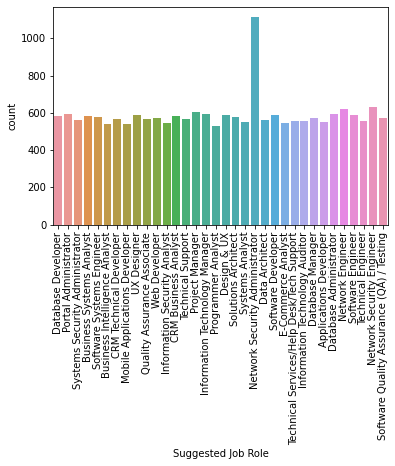

In [9]:
chart = sns.countplot(x=y)
chart.set_xticklabels(chart.get_xticklabels(),rotation=90)
plt.show()

In [10]:
import warnings
warnings.filterwarnings("ignore")

In [11]:
# One hot encoding values so that they can be fed into ANN
from sklearn.preprocessing import OneHotEncoder
X1 = OneHotEncoder().fit_transform(X)

In [12]:
y1 = y.copy(deep=True)

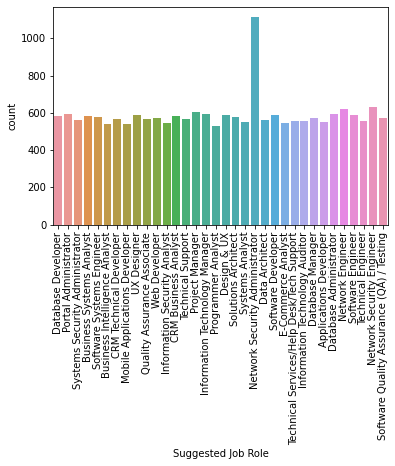

In [13]:
chart = sns.countplot(x=y1)
chart.set_xticklabels(chart.get_xticklabels(),rotation=90)
plt.show()

In [13]:
# train test split
from sklearn.model_selection import train_test_split
X_train1, X_test1, y_train1, y_test1 = train_test_split(X1,y1,test_size=0.2)

In [14]:
from sklearn.neural_network import MLPClassifier
clf1 = MLPClassifier(random_state=1).fit(X_train1,y_train1)    #using default parameters

In [15]:
from sklearn.metrics import accuracy_score
accuracy_score(clf1.predict(X_test1),y_test1)

0.03125

In [16]:
X_train1

<16000x470 sparse matrix of type '<class 'numpy.float64'>'
	with 608000 stored elements in Compressed Sparse Row format>

In [17]:
X_test1

<4000x470 sparse matrix of type '<class 'numpy.float64'>'
	with 152000 stored elements in Compressed Sparse Row format>

In [18]:
param_grid = [
        {
            'random_state': [1],
            'activation' : ['identity','logistic', 'tanh', 'relu'],
            'solver' : ['lbfgs', 'sgd', 'adam'],
            'hidden_layer_sizes': [
             (16,),(7,),(25,),(28,),
             (16,16),(7,7),(25,25),(28,28),
             (16,16,16),(7,7,7),(25,25,25),(28,28,28),
             ]
        }
       ]

Performing grid search on parameters (without modifying data (Only one hot encoded so as to apply ANN))

In [19]:
from sklearn.model_selection import GridSearchCV
clf2 = GridSearchCV(MLPClassifier(), param_grid, scoring='accuracy',n_jobs=-1)
clf2.fit(X_train1,y_train1)
print(clf2.best_params_)

{'activation': 'relu', 'hidden_layer_sizes': (16,), 'random_state': 1, 'solver': 'sgd'}


In [26]:
clf2.best_score_

0.0558125

In [27]:
clf2_best = MLPClassifier(activation='relu', hidden_layer_sizes = (16,), solver = 'sgd', random_state=1)
clf2_best.fit(X_train1,y_train1)

MLPClassifier(hidden_layer_sizes=(16,), random_state=1, solver='sgd')

In [28]:
print("Training Accuracy Score: ",accuracy_score(clf2_best.predict(X_train1),y_train1))
print("Testing Accuracy Score: ",accuracy_score(clf2_best.predict(X_test1),y_test1))

Training Accuracy Score:  0.056375
Testing Accuracy Score:  0.055


In [37]:
from sklearn.metrics import confusion_matrix, classification_report
cm2_train = confusion_matrix(clf2_best.predict(X_train1),y_train1)
cm2_test = confusion_matrix(clf2_best.predict(X_test1),y_test1)
cm2_train_cr = classification_report(clf2_best.predict(X_train1),y_train1)
cm2_test_cr = classification_report(clf2_best.predict(X_test1),y_test1)
print("Train confusion matrix")
print(cm2_train)
print("Test confusion matrix")
print(cm2_test)
print("Train Classification Report")
print(cm2_train_cr)
print("Test Classification Report")
print(cm2_test_cr)
print("Train classwise accuracies")
print(cm2_train.diagonal()/cm2_train.sum(axis=1))
print("Test classwise accuracies")
print(cm2_test.diagonal()/cm2_test.sum(axis=1))

Train confusion matrix
[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]
Test confusion matrix
[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]
Train Classification Report
                                           precision    recall  f1-score   support

                   Applications Developer       0.00      0.00      0.00         1
            Business Intelligence Analyst       0.00      0.00      0.00         0
                 Business Systems Analyst       0.00      0.00      0.00         0
                     CRM Business Analyst       0.00      0.00      0.00         3
                  CRM Technical Developer       0.00      0.00      0.00         0
                           Data Architect       0.00      0.00      0.00         0
                   Database Administrator       0.00      0.00      0.00         7
                      

Using Standard Scalar so as to have uniform distribution

In [14]:
from sklearn.preprocessing import StandardScaler
X2 = StandardScaler(with_mean=False).fit_transform(X1)
y2 = y.copy(deep=True)

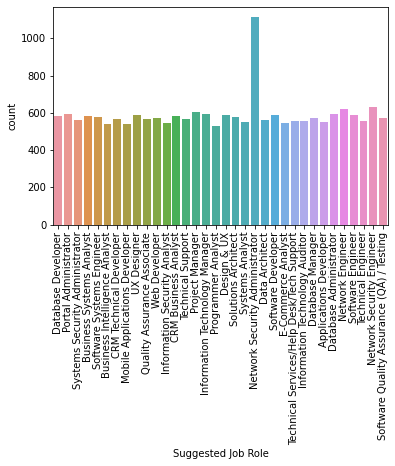

In [44]:
chart = sns.countplot(x=y2)
chart.set_xticklabels(chart.get_xticklabels(),rotation=90)
plt.show()

In [21]:
from sklearn.model_selection import train_test_split
X_train2, X_test2, y_train2, y_test2 = train_test_split(X2,y2,test_size=0.2)

In [22]:
from sklearn.model_selection import GridSearchCV
clf3 = GridSearchCV(MLPClassifier(), param_grid, scoring='accuracy',n_jobs=-1)
clf3.fit(X_train2,y_train2)
print(clf3.best_params_)

{'activation': 'logistic', 'hidden_layer_sizes': (7,), 'random_state': 1, 'solver': 'sgd'}


In [38]:
clf3_best = MLPClassifier(activation='logistic', hidden_layer_sizes = (7,), solver = 'sgd', random_state=1)
clf3_best.fit(X_train2,y_train2)

MLPClassifier(activation='logistic', hidden_layer_sizes=(7,), random_state=1,
              solver='sgd')

In [39]:
print("Training Accuracy Score: ",accuracy_score(clf3_best.predict(X_train2),y_train2))
print("Testing Accuracy Score: ",accuracy_score(clf3_best.predict(X_test2),y_test2))

Training Accuracy Score:  0.0564375
Testing Accuracy Score:  0.05275


In [40]:
from sklearn.metrics import confusion_matrix, classification_report
cm3_train = confusion_matrix(clf3_best.predict(X_train2),y_train2)
cm3_test = confusion_matrix(clf3_best.predict(X_test2),y_test2)
cm3_train_cr = classification_report(clf3_best.predict(X_train2),y_train2)
cm3_test_cr = classification_report(clf3_best.predict(X_test2),y_test2)
print("Train confusion matrix")
print(cm3_train)
print("Test confusion matrix")
print(cm3_test)
print("Train Classification Report")
print(cm3_train_cr)
print("Test Classification Report")
print(cm3_test_cr)
print("Train classwise accuracies")
print(cm3_train.diagonal()/cm3_train.sum(axis=1))
print("Test classwise accuracies")
print(cm3_test.diagonal()/cm3_test.sum(axis=1))

Train confusion matrix
[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 2 0 1]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]
Test confusion matrix
[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 1 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]
Train Classification Report
                                           precision    recall  f1-score   support

                   Applications Developer       0.00      0.00      0.00         0
            Business Intelligence Analyst       0.00      0.00      0.00         0
                 Business Systems Analyst       0.00      0.00      0.00         0
                     CRM Business Analyst       0.00      0.00      0.00         0
                  CRM Technical Developer       0.00      0.00      0.00         0
                           Data Architect       0.00      0.00      0.00         0
                   Database Administrator       0.00      0.00      0.00         0
                      

Now transforming data as shown under:

* 'Solutions Architect'  'Data Architect' 'Information Technology Auditor' --> others
* 'CRM Business Analyst' 'CRM Technical Developer' 'Project Manager' 'Information Technology Manager' --> Managerial roles/ CRM
* 'Business Systems Analyst' 'Business Intelligence Analyst''E-Commerce Analyst'--> Analyst 
* 'Mobile Applications Developer' 'Web Developer''Applications Developer'   --> Mobile Applications/ Web Development
* 'Software Quality Assurance (QA) / Testing' 'Quality Assurance Associate' --> QA/Testing
* 'UX Designer' 'Design & UX' --> UX/Design
* 'Database Developer' 'Database Administrator' 'Database Manager' 'Portal Administrator' --> Databases
* 'Programmer Analyst' 'Systems Analyst'--> Programming/ Systems Analyst
* 'Network Security Administrator' 'Network Security Engineer' 'Network Engineer''Systems Security Administrator' 'Software Systems Engineer''Information Security Analyst' --> Networks/ Systems
* 'Software Engineer' 'Software Developer' --> SE/SDE
* 'Technical Engineer' 'Technical Services/Help Desk/Tech Support' 'Technical Support'--> Technical Support/Service

In [15]:
y_trans = y.copy(deep=True)
y_trans

0                               Database Developer
1                             Portal Administrator
2                             Portal Administrator
3                   Systems Security Administrator
4                         Business Systems Analyst
                           ...                    
19995                           Technical Engineer
19996                           E-Commerce Analyst
19997                Business Intelligence Analyst
19998    Software Quality Assurance (QA) / Testing
19999                       Applications Developer
Name: Suggested Job Role, Length: 20000, dtype: object

In [16]:
y_trans = y_trans.replace(['CRM Business Analyst','CRM Technical Developer','Project Manager',
                    'Information Technology Manager'],'CRM/Managerial Roles')
y_trans = y_trans.replace(['Business Systems Analyst','Business Intelligence Analyst','E-Commerce Analyst'],'Analyst')
y_trans = y_trans.replace(['Mobile Applications Developer','Web Developer',
                    'Applications Developer'],'Mobile Applications/ Web Development')
y_trans = y_trans.replace(['Software Quality Assurance (QA) / Testing','Quality Assurance Associate'],'QA/Testing')
y_trans = y_trans.replace(['UX Designer','Design & UX'] , 'UX/Design')
y_trans = y_trans.replace(['Database Developer','Database Administrator',
                    'Database Manager','Portal Administrator'] , 'Databases')
y_trans = y_trans.replace(['Programmer Analyst','Systems Analyst'],'Programming/ Systems Analyst')
y_trans = y_trans.replace(['Network Security Administrator','Network Security Engineer',
                    'Network Engineer','Systems Security Administrator',
                    'Software Systems Engineer','Information Security Analyst'],'Networks/ Systems')
y_trans = y_trans.replace(['Software Engineer','Software Developer'] ,'SE/SDE')
y_trans = y_trans.replace(['Technical Engineer','Technical Services/Help Desk/Tech Support',
                    'Technical Support'],'Technical Support/Service')
y_trans = y_trans.replace(['Solutions Architect','Data Architect','Information Technology Auditor'],'others')
y_trans

0                                   Databases
1                                   Databases
2                                   Databases
3                           Networks/ Systems
4                                     Analyst
                         ...                 
19995               Technical Support/Service
19996                                 Analyst
19997                                 Analyst
19998                              QA/Testing
19999    Mobile Applications/ Web Development
Name: Suggested Job Role, Length: 20000, dtype: object

In [41]:
X_train_m, X_test_m, y_train_m, y_test_m = train_test_split(X2,y_trans,test_size=0.2)
clf4 = GridSearchCV(MLPClassifier(), param_grid, scoring='accuracy',n_jobs=-1)
clf4.fit(X_train_m,y_train_m)
print(clf4.best_params_)

{'activation': 'logistic', 'hidden_layer_sizes': (16, 16), 'random_state': 1, 'solver': 'sgd'}


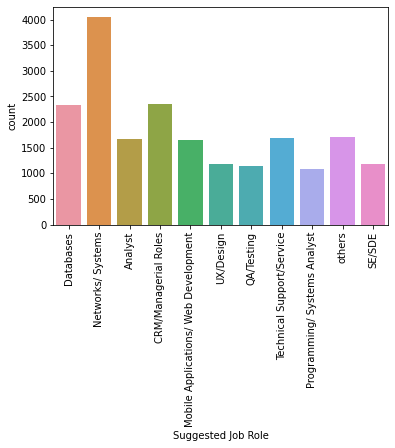

In [42]:
chart = sns.countplot(x=y_trans)
chart.set_xticklabels(chart.get_xticklabels(),rotation=90)
plt.show()

In [45]:
clf4_best = MLPClassifier(activation='logistic', hidden_layer_sizes = (16,16), solver = 'sgd', random_state=1)
clf4_best.fit(X_train_m,y_train_m)

MLPClassifier(activation='logistic', hidden_layer_sizes=(16, 16),
              random_state=1, solver='sgd')

In [46]:
print("Training Accuracy Score: ",accuracy_score(clf4_best.predict(X_train_m),y_train_m))
print("Testing Accuracy Score: ",accuracy_score(clf4_best.predict(X_test_m),y_test_m))

Training Accuracy Score:  0.201
Testing Accuracy Score:  0.20675


In [47]:
from sklearn.metrics import confusion_matrix, classification_report
cm4_train = confusion_matrix(clf4_best.predict(X_train_m),y_train_m)
cm4_test = confusion_matrix(clf4_best.predict(X_test_m),y_test_m)
cm4_train_cr = classification_report(clf4_best.predict(X_train_m),y_train_m)
cm4_test_cr = classification_report(clf4_best.predict(X_test_m),y_test_m)
print("Train confusion matrix")
print(cm4_train)
print("Test confusion matrix")
print(cm4_test)
print("Train Classification Report")
print(cm4_train_cr)
print("Test Classification Report")
print(cm4_test_cr)
print("Train classwise accuracies")
print(cm4_train.diagonal()/cm4_train.sum(axis=1))
print("Test classwise accuracies")
print(cm4_test.diagonal()/cm4_test.sum(axis=1))

Train confusion matrix
[[   0    0    0    0    0    0    0    0    0    0    0]
 [   0    0    0    0    0    0    0    0    0    0    0]
 [   0    0    0    0    0    0    0    0    0    0    0]
 [   0    0    0    0    0    0    0    0    0    0    0]
 [1329 1876 1869 1334 3216  875  917  935 1356  934 1359]
 [   0    0    0    0    0    0    0    0    0    0    0]
 [   0    0    0    0    0    0    0    0    0    0    0]
 [   0    0    0    0    0    0    0    0    0    0    0]
 [   0    0    0    0    0    0    0    0    0    0    0]
 [   0    0    0    0    0    0    0    0    0    0    0]
 [   0    0    0    0    0    0    0    0    0    0    0]]
Test confusion matrix
[[  0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0]
 [339 468 468 325 827 204 219 242 324 243 341]
 [  0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0 

After performing Oversampling 

In [17]:
from scipy import sparse
X3 = sparse.csr_matrix.copy(X2)
y3 = y_trans.copy(deep=True)

In [18]:
from imblearn.over_sampling import RandomOverSampler
ros = RandomOverSampler(random_state=42)
X_ovs, y_ovs = ros.fit_resample(X3, y3)

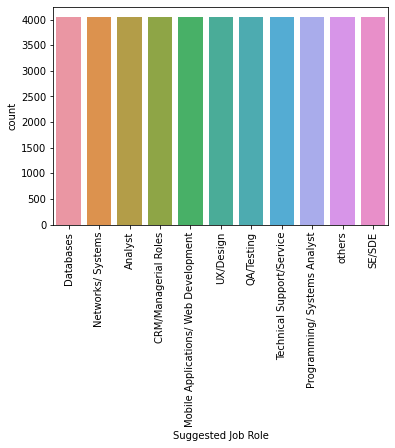

In [24]:
chart = sns.countplot(x=y_ovs)
chart.set_xticklabels(chart.get_xticklabels(),rotation=90)
plt.show()

In [19]:
from sklearn.model_selection import train_test_split
X_train5, X_test5, y_train5, y_test5 = train_test_split(X_ovs,y_ovs,test_size=0.2)

In [52]:
from sklearn.model_selection import GridSearchCV
clf5 = GridSearchCV(MLPClassifier(), param_grid, scoring='accuracy',n_jobs=-1)
clf5.fit(X_train5,y_train5)
print(clf5.best_params_)

{'activation': 'tanh', 'hidden_layer_sizes': (28, 28, 28), 'random_state': 1, 'solver': 'adam'}


In [53]:
clf5_best = MLPClassifier(activation='tanh', hidden_layer_sizes = (28,28,28), solver = 'adam', random_state=1)
clf5_best.fit(X_train5,y_train5)

MLPClassifier(activation='tanh', hidden_layer_sizes=(28, 28, 28),
              random_state=1)

In [54]:
print("Training Accuracy Score: ",accuracy_score(clf5_best.predict(X_train5),y_train5))
print("Testing Accuracy Score: ",accuracy_score(clf5_best.predict(X_test5),y_test5))

Training Accuracy Score:  0.8145483163752881
Testing Accuracy Score:  0.6382237211916807


In [27]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.neural_network import MLPClassifier

In [28]:
clf5_try2 = MLPClassifier(activation='tanh', hidden_layer_sizes = (44,44,44), solver = 'adam', random_state=1)
clf5_try2.fit(X_train5,y_train5)
print("Training Accuracy Score: ",accuracy_score(clf5_try2.predict(X_train5),y_train5))
print("Testing Accuracy Score: ",accuracy_score(clf5_try2.predict(X_test5),y_test5))

Training Accuracy Score:  0.9829107875653493
Testing Accuracy Score:  0.7743676222596965


In [79]:
clf5_try3 = MLPClassifier(activation='tanh', hidden_layer_sizes = (47,47,47), solver = 'adam', random_state=1)
clf5_try3.fit(X_train5,y_train5)
print("Training Accuracy Score: ",accuracy_score(clf5_try3.predict(X_train5),y_train5))
print("Testing Accuracy Score: ",accuracy_score(clf5_try3.predict(X_test5),y_test5))

Training Accuracy Score:  0.998144921018607
Testing Accuracy Score:  0.7827993254637436


In [80]:
clf5_try4 = MLPClassifier(activation='tanh', hidden_layer_sizes = (50,50,50), solver = 'adam', random_state=1)
clf5_try4.fit(X_train5,y_train5)
print("Training Accuracy Score: ",accuracy_score(clf5_try4.predict(X_train5),y_train5))
print("Testing Accuracy Score: ",accuracy_score(clf5_try4.predict(X_test5),y_test5))

Training Accuracy Score:  0.9986789589071898
Testing Accuracy Score:  0.7845980888139404


In [83]:
from sklearn.metrics import confusion_matrix, classification_report
cm5_train = confusion_matrix(clf5_try4.predict(X_train5),y_train5)
cm5_test = confusion_matrix(clf5_try4.predict(X_test5),y_test5)
cm5_train_cr = classification_report(clf5_try4.predict(X_train5),y_train5)
cm5_test_cr = classification_report(clf5_try4.predict(X_test5),y_test5)
print("Train confusion matrix")
print(cm5_train)
print("Test confusion matrix")
print(cm5_test)
print("Train Classification Report")
print(cm5_train_cr)
print("Test Classification Report")
print(cm5_test_cr)
print("Train classwise accuracies")
print(cm5_train.diagonal()/cm5_train.sum(axis=1))
print("Test classwise accuracies")
print(cm5_test.diagonal()/cm5_test.sum(axis=1))

Train confusion matrix
[[3217    0    0    0    0    0    0    0    0    0    0]
 [   0 3186    3    0    8    0    0    0    0    1    0]
 [   0    3 3252    0    1    0    1    0    0    0    0]
 [   0    0    0 3237    2    0    0    0    1    0    0]
 [   0    5    6    0 3193    0    0    0    1    0    2]
 [   0    0    0    0    0 3219    0    0    0    0    0]
 [   0    0    0    0    2    0 3254    0    0    0    0]
 [   0    1    1    0    1    0    0 3250    0    0    1]
 [   0    0    0    0    3    0    0    0 3264    0    0]
 [   0    0    0    0    1    0    0    0    0 3200    0]
 [   0    0    0    0    3    0    0    0    0    0 3259]]
Test confusion matrix
[[692  33  15   8  77   2   5   3  15   1  16]
 [ 18 572  28  17 104   4   8   3  14   4  25]
 [ 16  34 517  14  78   2   4   5   7   5  10]
 [  2  32  27 686  71   5   6   5  18   3   4]
 [ 27  45  50  18 117   2   9   5  28   9  13]
 [  8  23  23  10  50 791   2   5  11   3   9]
 [ 10  22  18   6  62   5 738   5 

Trying different splits

In [29]:
from sklearn.model_selection import train_test_split
X_trains, X_tests, y_trains, y_tests = train_test_split(X_ovs,y_ovs,test_size=0.3)

In [30]:
clf5_try1 = MLPClassifier(activation='tanh', hidden_layer_sizes = (44,44,44), solver = 'adam', random_state=1)
clf5_try1.fit(X_trains,y_trains)
print("Training Accuracy Score: ",accuracy_score(clf5_try1.predict(X_trains),y_trains))
print("Testing Accuracy Score: ",accuracy_score(clf5_try1.predict(X_tests),y_tests))

Training Accuracy Score:  0.9967556454980566
Testing Accuracy Score:  0.7545345525408484


In [31]:
from sklearn.model_selection import train_test_split
X_trainss, X_testss, y_trainss, y_testss = train_test_split(X_ovs,y_ovs,test_size=0.25)

In [32]:
clf5_try11 = MLPClassifier(activation='tanh', hidden_layer_sizes = (44,44,44), solver = 'adam', random_state=1)
clf5_try11.fit(X_trainss,y_trainss)
print("Training Accuracy Score: ",accuracy_score(clf5_try11.predict(X_trainss),y_trainss))
print("Testing Accuracy Score: ",accuracy_score(clf5_try11.predict(X_testss),y_testss))

Training Accuracy Score:  0.9966720633207411
Testing Accuracy Score:  0.7675150643043439


In [33]:
from sklearn.model_selection import train_test_split
X_trainsss, X_testsss, y_trainsss, y_testsss = train_test_split(X_ovs,y_ovs,test_size=0.4)
clf5_try111 = MLPClassifier(activation='tanh', hidden_layer_sizes = ((44,44,44)), solver = 'adam', random_state=1)
clf5_try111.fit(X_trainsss,y_trainsss)
print("Training Accuracy Score: ",accuracy_score(clf5_try111.predict(X_trainsss),y_trainsss))
print("Testing Accuracy Score: ",accuracy_score(clf5_try111.predict(X_testsss),y_testsss))

Training Accuracy Score:  0.9982011018251321
Testing Accuracy Score:  0.7189432265317595


In [34]:
from sklearn.model_selection import train_test_split
X_trainsss, X_testsss, y_trainsss, y_testsss = train_test_split(X_ovs,y_ovs,test_size=0.1)
clf5_try111 = MLPClassifier(activation='tanh', hidden_layer_sizes = (44,44,44), solver = 'adam', random_state=1)
clf5_try111.fit(X_trainsss,y_trainsss)
print("Training Accuracy Score: ",accuracy_score(clf5_try111.predict(X_trainsss),y_trainsss))
print("Testing Accuracy Score: ",accuracy_score(clf5_try111.predict(X_testsss),y_testsss))

Training Accuracy Score:  0.9313179262960649
Testing Accuracy Score:  0.7486510791366906


In [22]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.neural_network import MLPClassifier
X_trainn, X_testn, y_trainn, y_testn = train_test_split(X_ovs,y_ovs,test_size=0.15)
clf5_tryn = MLPClassifier(activation='tanh', hidden_layer_sizes = (44,44,44), solver = 'adam', random_state=1)
clf5_tryn.fit(X_trainn,y_trainn)
print("Training Accuracy Score: ",accuracy_score(clf5_tryn.predict(X_trainn),y_trainn))
print("Testing Accuracy Score: ",accuracy_score(clf5_tryn.predict(X_testn),y_testn))

Training Accuracy Score:  0.9506110787789006
Testing Accuracy Score:  0.7609054114825363


In [23]:
pickle.dump(clf5_tryn, open("final_model.sav", 'wb'))

In [36]:
X_ovs.shape

(44473, 470)

Further Clubbing the output labels

In [59]:
y_trans_new = y_trans.copy(deep=True)
y_trans_new

0                                   Databases
1                                   Databases
2                                   Databases
3                           Networks/ Systems
4                                     Analyst
                         ...                 
19995               Technical Support/Service
19996                                 Analyst
19997                                 Analyst
19998                              QA/Testing
19999    Mobile Applications/ Web Development
Name: Suggested Job Role, Length: 20000, dtype: object

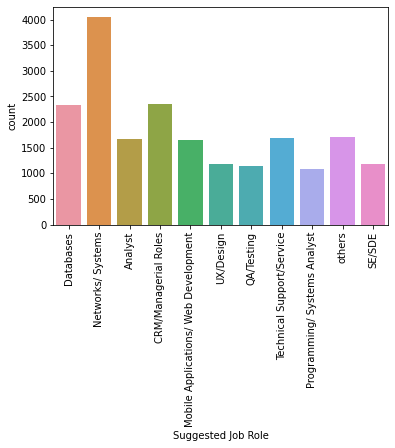

In [60]:
chart = sns.countplot(x=y_trans_new)
chart.set_xticklabels(chart.get_xticklabels(),rotation=90)
plt.show()

In [61]:
y_trans_new = y_trans_new.replace(['Programming/ Systems Analyst'],'Analyst')
y_trans_new = y_trans_new.replace(['Analyst','CRM/Managerial Roles'],'Analyst/CRM/Managerial Roles')
y_trans_new = y_trans_new.replace(['UX/Design','QA/Testing'],'UX/Design or QA/testing')
y_trans_new = y_trans_new.replace(['Technical Support/Service'] , 'others')
y_trans_new

0                                   Databases
1                                   Databases
2                                   Databases
3                           Networks/ Systems
4                Analyst/CRM/Managerial Roles
                         ...                 
19995                                  others
19996            Analyst/CRM/Managerial Roles
19997            Analyst/CRM/Managerial Roles
19998                 UX/Design or QA/testing
19999    Mobile Applications/ Web Development
Name: Suggested Job Role, Length: 20000, dtype: object

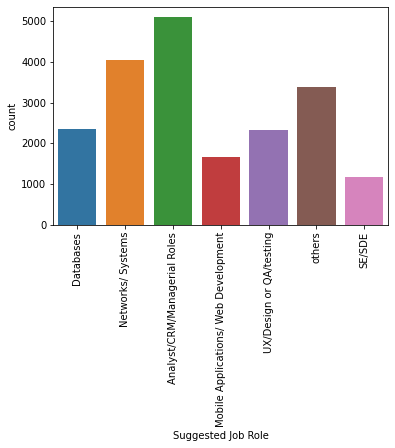

In [62]:
chart = sns.countplot(x=y_trans_new)
chart.set_xticklabels(chart.get_xticklabels(),rotation=90)
plt.show()

In [63]:
from imblearn.over_sampling import RandomOverSampler
ros = RandomOverSampler(random_state=42)
X_ovs_new, y_ovs_new = ros.fit_resample(X3, y_trans_new)

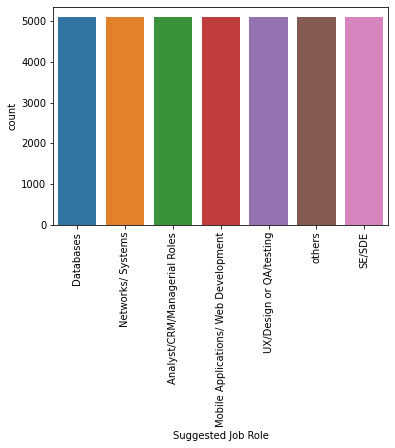

In [64]:
chart = sns.countplot(x=y_ovs_new)
chart.set_xticklabels(chart.get_xticklabels(),rotation=90)
plt.show()

In [65]:
param_grid = [
        {
            'random_state': [1],
            'activation' : ['tanh'],
            'solver' : ['adam'],
            'hidden_layer_sizes': [
               (33,33,33),(37,37,37),
               (33,),(37,),(33,33,33,33),
               (37,37,37,37),(16,),(42,)
             ]
        }
       ]

In [66]:
from sklearn.model_selection import train_test_split
X_train6, X_test6, y_train6, y_test6 = train_test_split(X_ovs_new,y_ovs_new,test_size=0.2)

In [67]:
from sklearn.model_selection import GridSearchCV
clf6 = GridSearchCV(MLPClassifier(), param_grid, scoring='accuracy',n_jobs=-1)
clf6.fit(X_train6,y_train6)
print(clf6.best_params_)
print(clf6.best_score_)

{'activation': 'tanh', 'hidden_layer_sizes': (37, 37, 37), 'random_state': 1, 'solver': 'adam'}
0.6279070032142515


In [68]:
clf6_best = MLPClassifier(activation='tanh', hidden_layer_sizes = (37,37,37), solver = 'adam', random_state=1)
clf6_best.fit(X_train6,y_train6)

MLPClassifier(activation='tanh', hidden_layer_sizes=(37, 37, 37),
              random_state=1)

In [69]:
print("Training Accuracy Score: ",accuracy_score(clf6_best.predict(X_train6),y_train6))
print("Testing Accuracy Score: ",accuracy_score(clf6_best.predict(X_test6),y_test6))

Training Accuracy Score:  0.9507874706233119
Testing Accuracy Score:  0.6527777777777778


In [70]:
clf6_try1 = MLPClassifier(activation='tanh', hidden_layer_sizes = (44,44,44), solver = 'adam', random_state=1)
clf6_try1.fit(X_train6,y_train6)
print("Training Accuracy Score: ",accuracy_score(clf6_try1.predict(X_train6),y_train6))
print("Testing Accuracy Score: ",accuracy_score(clf6_try1.predict(X_test6),y_test6))

Training Accuracy Score:  0.9993686204356519
Testing Accuracy Score:  0.6745230078563412


In [74]:
from sklearn.metrics import confusion_matrix, classification_report
cm6_train = confusion_matrix(clf6_try1.predict(X_train6),y_train6)
cm6_test = confusion_matrix(clf6_try1.predict(X_test6),y_test6)
cm6_train_cr = classification_report(clf6_try1.predict(X_train6),y_train6)
cm6_test_cr = classification_report(clf6_try1.predict(X_test6),y_test6)
print("Train confusion matrix")
print(cm6_train)
print("Test confusion matrix")
print(cm6_test)
print("Train Classification Report")
print(cm6_train_cr)
print("Test Classification Report")
print(cm6_test_cr)
print("Train classwise accuracies")
print(cm6_train.diagonal()/cm6_train.sum(axis=1))
print("Test classwise accuracies")
print(cm6_test.diagonal()/cm6_test.sum(axis=1))

Train confusion matrix
[[4073    0    0    1    0    0    5]
 [   1 4068    0    0    0    0    0]
 [   0    0 4123    0    0    0    0]
 [   2    0    0 4073    0    0    0]
 [   0    0    0    0 4051    0    0]
 [   1    0    0    0    0 4052    0]
 [   7    0    0    0    0    1 4051]]
Test confusion matrix
[[ 196   55   27  149    1   38  114]
 [ 140  811   14  100    2   33   62]
 [  91   30  887   77    3   24   56]
 [ 188   39   13  435    8   33   83]
 [  77   24    7   51 1013   21   38]
 [ 142   20   10   95    3  846   62]
 [ 173   44   10  110   10   43  620]]
Train Classification Report
                                      precision    recall  f1-score   support

        Analyst/CRM/Managerial Roles       1.00      1.00      1.00      4079
                           Databases       1.00      1.00      1.00      4069
Mobile Applications/ Web Development       1.00      1.00      1.00      4123
                   Networks/ Systems       1.00      1.00      1.00      4075
  

### CONCLUSION:

Model performs best when y is clubbed as the following

       'Databases', 'Networks/ Systems', 'Analyst',
       'CRM/Managerial Roles', 'Mobile Applications/ Web Development',
       'UX/Design', 'QA/Testing', 'Technical Support/Service',
       'Programming/ Systems Analyst', 'others', 'SE/SDE'
       
i.e. in total 11 classes

###### Clubbing technique
* 'Solutions Architect'  'Data Architect' 'Information Technology Auditor' --> others
* 'CRM Business Analyst' 'CRM Technical Developer' 'Project Manager' 'Information Technology Manager' --> Managerial roles/ CRM
* 'Business Systems Analyst' 'Business Intelligence Analyst''E-Commerce Analyst'--> Analyst 
* 'Mobile Applications Developer' 'Web Developer''Applications Developer'   --> Mobile Applications/ Web Development
* 'Software Quality Assurance (QA) / Testing' 'Quality Assurance Associate' --> QA/Testing
* 'UX Designer' 'Design & UX' --> UX/Design
* 'Database Developer' 'Database Administrator' 'Database Manager' 'Portal Administrator' --> Databases
* 'Programmer Analyst' 'Systems Analyst'--> Programming/ Systems Analyst
* 'Network Security Administrator' 'Network Security Engineer' 'Network Engineer''Systems Security Administrator' 'Software Systems Engineer''Information Security Analyst' --> Networks/ Systems
* 'Software Engineer' 'Software Developer' --> SE/SDE
* 'Technical Engineer' 'Technical Services/Help Desk/Tech Support' 'Technical Support'--> Technical Support/Service

###### Transformation on X ==> OneHotEncoder and StandardScaler applied

###### Transformation on dataset as whole ==> oversampling

###### with following parameters:
* activation='tanh'
* hidden_layer_sizes = (44,44,44)
* solver = 'adam'
* train_test_split = 85:15

Metrics for the model made by combination of best parameters obtained after multiple tries and tests

In [25]:
from sklearn.metrics import confusion_matrix,classification_report

In [26]:
print("Training Accuracy Score: ",accuracy_score(clf5_tryn.predict(X_trainn),y_trainn))
print("Testing Accuracy Score: ",accuracy_score(clf5_tryn.predict(X_testn),y_testn))
cm5_train = confusion_matrix(clf5_tryn.predict(X_trainn),y_trainn)
cm5_test = confusion_matrix(clf5_tryn.predict(X_testn),y_testn)
cm5_train_cr = classification_report(clf5_tryn.predict(X_trainn),y_trainn)
cm5_test_cr = classification_report(clf5_tryn.predict(X_testn),y_testn)
print("-----------------------------------")
print("Train confusion matrix")
print("-----------------------------------")
print(cm5_train)
print("-----------------------------------")
print("Test confusion matrix")
print("-----------------------------------")
print(cm5_test)
print("-----------------------------------")
print("Train Classification Report")
print("-----------------------------------")
print(cm5_train_cr)
print("-----------------------------------")
print("Test Classification Report")
print("-----------------------------------")
print(cm5_test_cr)
print("-----------------------------------")
print("Train classwise accuracies")
print("-----------------------------------")
l1 = cm5_train.diagonal()/cm5_train.sum(axis=1)
print(l1)
l2 = cm5_test.diagonal()/cm5_test.sum(axis=1)
print("-----------------------------------")
print("Test classwise accuracies")
print("-----------------------------------")
print(l2)
print("-----------------------------------")
print("Train mean class accuracies: ",np.mean(l1))
print("Test classwise accuracies: ",np.mean(l2))

Training Accuracy Score:  0.9506110787789006
Testing Accuracy Score:  0.7609054114825363
-----------------------------------
Train confusion matrix
-----------------------------------
[[3361    9    6    0   36    0    0    0    3    0    4]
 [  12 3066   25   17  364    3    0    5   19    3    6]
 [  11   43 3216    2  262    0    0    0   15    0    9]
 [   3   17    5 3330   64    1    0    1    8    2    1]
 [  28  265  159   29 2538    1    0    8   41    0   31]
 [   2    3    0    9    4 3446    0    0    2    1    2]
 [   2    3   10    0   15    0 3446    0    1    1   21]
 [   1    4    1    0   11    0    0 3406    1    3    4]
 [   4   26   13    7   84    0    0    0 3332    0    5]
 [   3    3    1    2    5    0    0    0    3 3434    0]
 [   4   11   16    1   53    0    1    1    5    0 3360]]
-----------------------------------
Test confusion matrix
-----------------------------------
[[509  19  11  11  45   0   1   2   8   6  10]
 [ 21 349  27  16  62   3   2   6  1